In [1]:
#多元线性回归分析模型


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import time

In [15]:
df = pd.read_csv('bitcoin_2012-01-01_to_2018-10-31.csv',parse_dates=True)
df.dropna(axis=0,how='any',inplace=True)

In [16]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [17]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [18]:
#用默认值填充
df.fillna(value=-99999,inplace=True)

In [19]:
#用删除法填充
df.dropna(inplace=True)

In [20]:
#利用math函数，获取总的数据量，来做结果推算，
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)

25


In [21]:
#添加一个label标签作为最后预测的股价，注意shift函数在pandas中的使用
forecast_col = 'Close'
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

<AxesSubplot:>

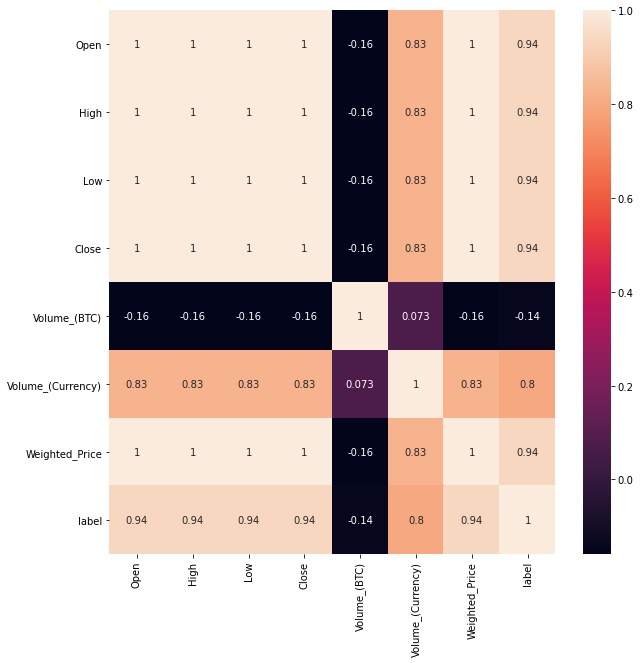

In [23]:
#用热力图观察每个字段的影响度
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [24]:
#上面的热力图可以看出 open,high,low,close,weighted_price,label,关联度比较高，所以选用这些字段来预测股价
df = df[['Open','High','Low','Close','Weighted_Price','label']]

In [25]:
df.head(5)

,Open,High,Low,Close,Weighted_Price,label
0,4.465000,4.482500,4.465000,4.482500,4.471603,6.281944
1,4.806667,4.806667,4.806667,4.806667,4.806667,6.185000
2,5.000000,5.000000,5.000000,5.000000,5.000000,5.651429
3,5.252500,5.252500,5.252500,5.252500,5.252500,4.910000
4,5.200000,5.223333,5.200000,5.223333,5.208159,5.696000


In [26]:
#再次添加‘HL_PCT’和‘PCT_change’这两个高关联度的字段，加大关联性
df['HL_PCT'] = (df['High']-df['Low']) / df['Close'] * 100.0
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0


In [27]:
df = df[['Close','HL_PCT','PCT_change','Weighted_Price','label']]

In [29]:
df.isnull().sum()

Close              0
HL_PCT             0
PCT_change         0
Weighted_Price     0
label             25
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
X = np.array(df.drop(['label'],1))
Y = np.array(df['label'])

In [34]:
X = preprocessing.scale(X)
clf = LinearRegression()

In [35]:
x_lately = X[-forecast_out:]
X = X[:-forecast_out]
Y = Y[:-forecast_out]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)
clf.fit(x_train,y_train)

LinearRegression()

In [37]:
confidence = clf.score(x_test,y_test)

In [38]:
print(confidence)

0.9275529718062733


In [39]:
forecast_set = clf.predict(x_lately)

In [40]:
style.use('ggplot')

In [44]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
last_unix = time.mktime(last_date.timetuple())
one_day = 864006
next_unix = last_unix + one_day

AttributeError: 'numpy.int64' object has no attribute 'timestamp'

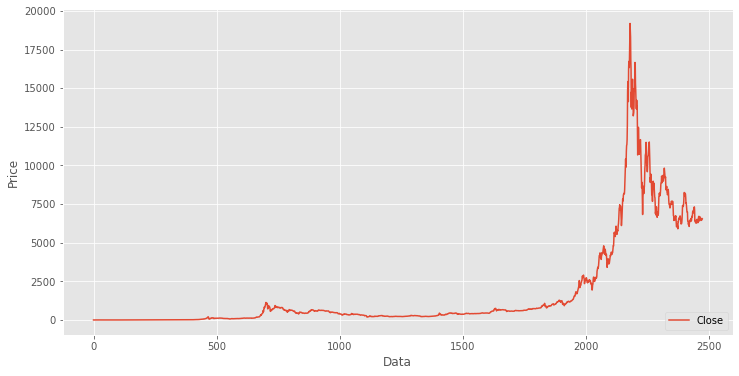

In [43]:
plt.rcParams['figure.figsize'] = [12,6]
df['Close'].plot()
plt.legend(loc=4)
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()

In [ ]:
for i in foreca